# AuxTel Pointing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

from astropy.table import Table, join

In [2]:
%matplotlib inline


In [3]:
from datetime import date
date = date.today().strftime("%d%m%Y")
print(f'Today is: {date}')

Today is: 05052022


## The Dataset

Basically, we query the WCS solution from the bulter calibrate task, the boresight pointing position and some information from the exposure metadata. The sample was queried using the script `query_pointing_bluter_reviewed.py`.

The main quantities of this dataset are:
- `RA`, `DEC` : pointing sky position from the boersight
- `RA_WCS`, `DEC_WCS` : pointing sky position from the wcs solutions
- `PNT_OFFSET`: angular distance between the two pointings.

The other columns are exclusively from the metadata and the end with `_MD`: `RA`, `DEC`,`MJD`,`EXPTIME`,`TEMP_SET`,`CCDTEMP`,`FILTER`,`ELSTART`,`ELEND`,`AZSTART`,`AZEND`

The file `data/rev_checking_auxtel_pointing_{date}.csv` contains info about 1421 exposures taken from Feb 2020 up to Nov 2021. The collection used to generate this file was `u/mfl/testProcessCcd_srcMatchFull_181e6356`. And it's from the `lsst.rapid.analysis.butlerUtils`.

<br>
 <font size="4"> <b> Caveat: </b> Not all the images from the observation nights. The calibration filters exposures selecting preferentially crowded fields.</font> 

# The Telescope Pointing

In [4]:
month = 'May2022'
title = 'Feb 2022 - May 2022'

In [5]:
import pandas as pd

df0 = pd.read_csv('data/rev_checking_auxtel_pointing_24032022.csv',index_col=0)
df1 = pd.read_csv('data/rev_checking_auxtel_pointing_Feb2022.csv',index_col=0)
df2 = pd.read_csv('data/rev_checking_auxtel_pointing_Mar2022.csv',index_col=0)
df3 = pd.read_csv('data/2022_Apr.csv',index_col=0)
df4 = pd.read_csv('data/2022_May_partial03.csv',index_col=0)

df = pd.concat([df1,df2,df3,df4])
df.DATE = pd.to_datetime(df.DATE)#.dt.date

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df[cols].copy()

In [6]:
# df = df.sort_values(by='MJD')

In [7]:
import numpy as np

deg = np.pi/180.
def separation(ra1,dec1,ra2,dec2):
    return np.sqrt( np.cos(dec1*deg)*(ra1-ra2)**2 + (dec1-dec2)**2 )*3600.

def getAngDist(ra1, dec1, ra2, dec2):
    # output in arcmin
    delt_lon = (ra1 - ra2)*np.pi/180.
    delt_lat = (dec1 - dec2)*np.pi/180.
    # Haversine formula
    dist = 2.0*np.arcsin( np.sqrt( np.sin(delt_lat/2.0)**2 + \
         np.cos(dec1*np.pi/180.)*np.cos(dec2*np.pi/180.)*np.sin(delt_lon/2.0)**2 ) )  
    return (dist/np.pi*180.)*60

## Plots

In [14]:
df['month_year'] = df['DATE'].apply(lambda x: x.strftime('%Y %b')) # e.g. Jul 2021
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year + df.month/12

df1 = df[~outliers]


In [15]:
# df1 = df[cols][~outliers]
# # df1['DATE'] = df1['DATE'].dt.date

In [16]:
df

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET,month_year,month,year
2022021500334,2022-02-16 05:15:05.733902,59626.218816,30.0,221.936175,-44.873064,1.713512,349.630287,126.004815,35.625102,221.935959,...,221.933210,-44.863407,0.177883,-0.579456,0.729290,-0.033826,0.593012,2022 Feb,2,2022.166667
2022021500335,2022-02-16 05:15:38.543128,59626.219196,30.0,221.936077,-44.873011,1.709549,349.630190,125.985544,35.721394,221.935959,...,221.933222,-44.863450,0.171321,-0.573620,0.722106,-0.031024,0.586330,2022 Feb,2,2022.166667
2022021500338,2022-02-16 05:20:47.760507,59626.222775,30.0,222.009271,-45.060016,1.674180,350.699590,126.055943,36.601310,222.008862,...,222.003776,-45.053544,0.329695,-0.388286,0.520062,-0.176488,0.452778,2022 Feb,2,2022.166667
2022021500339,2022-02-16 05:21:20.658143,59626.223156,30.0,222.009107,-45.060422,1.670423,350.698015,126.039128,36.697655,222.008862,...,222.003926,-45.053505,0.310875,-0.414995,0.551124,-0.160274,0.469518,2022 Feb,2,2022.166667
2022021500344,2022-02-16 05:24:43.154545,59626.225499,30.0,220.816953,-44.782210,1.618408,352.823544,125.454126,38.088455,220.815877,...,220.811139,-44.772104,0.348876,-0.606349,0.803547,-0.173650,0.654973,2022 Feb,2,2022.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022050300907,2022-05-04 07:25:35.374497,59703.309437,30.0,221.210388,-45.341553,1.223385,359.999803,232.793063,54.794783,221.209647,...,221.211997,-45.337843,-0.096559,-0.222558,-0.355245,-0.108215,0.232677,2022 May,5,2022.416667
2022050300908,2022-05-04 07:26:16.152494,59703.309909,30.0,221.209934,-45.341611,1.225146,0.000760,232.832742,54.676507,221.209647,...,221.211770,-45.337876,-0.110120,-0.224078,-0.354272,-0.117313,0.237070,2022 May,5,2022.416667
2022050300909,2022-05-04 07:26:48.710490,59703.310286,30.0,221.209738,-45.341602,1.226567,0.000826,232.863304,54.584269,221.209647,...,221.211788,-45.337883,-0.123021,-0.223127,-0.349454,-0.125619,0.239297,2022 May,5,2022.416667
2022050300910,2022-05-04 07:27:29.497991,59703.310758,30.0,221.209729,-45.341599,1.228358,0.008172,232.901808,54.466204,221.209647,...,221.211972,-45.337858,-0.134522,-0.224456,-0.348784,-0.133270,0.243560,2022 May,5,2022.416667


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set_context('talk', font_scale=0.9)

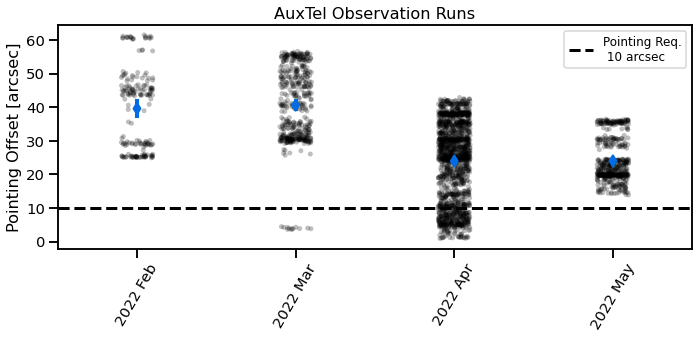

In [19]:
# fig.autofmt_xdate(rotation=45)
fig = plt.figure(figsize=(10,5))
sns.stripplot(x=df.month_year, y=df.PNT_OFFSET*60,color="black", data=df, dodge=True, alpha=.25, zorder=1)
# ax = sns.pointplot(x=df.month_year, y='PNT_OFFSET', data=df, markers="d", palette="magma", scale=.75, ci=99)

# sns.stripplot(x=df.month_year, y='PNT_OFFSET', color="black", data=df, dodge=True, alpha=.25, zorder=1)
ax = sns.pointplot(x=df.month_year, y=df.PNT_OFFSET*60, data=df, markers="d", color="#016CE4", scale=.75, ci=99, join=False)

ax.axhline(10,color='k',ls='--',lw=3, label='Pointing Req.\n 10 arcsec')
# ax.set_title('Joliette')
ax.set_ylabel('Pointing Offset [arcsec]')
ax.set_xlabel('')
ax.set_title('AuxTel Observation Runs')
ax.legend(fontsize=12)
ax.tick_params(axis='x', rotation=60)
fig.tight_layout()
# fig.savefig(f'figures/pointing_offset_monthly_{month}.png',facecolor='w',transparent=False,dpi=100)

In [20]:
p1,pm,p2 = np.percentile(df3.PNT_OFFSET, [16,50,84])
s68 = (p2-p1)/2.
s68*60

14.446590159763286

In [21]:
mybins = np.arange(0.,2.3,7/60.)
end_2021 = (df1['year']>=2022)&(df1['month']>3)
sep_up = end_2021 | (df1['year']>=2022)

In [22]:
df1['month_year'][sep_up]

2022021500334    2022 Feb
2022021500335    2022 Feb
2022021500338    2022 Feb
2022021500339    2022 Feb
2022021500344    2022 Feb
                   ...   
2022050300907    2022 May
2022050300908    2022 May
2022050300909    2022 May
2022050300910    2022 May
2022050300911    2022 May
Name: month_year, Length: 2851, dtype: object

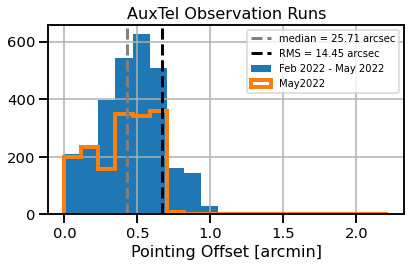

In [23]:
df['PNT_OFFSET'].hist(bins=mybins,label=title,density=False,lw=4)
df3['PNT_OFFSET'].hist(bins=mybins,label=month,density=False, histtype='step',lw=4)

plt.axvline(pm,color='gray',ls='--',lw=3, label=r'median = %.2f arcsec'%(pm*60))
plt.axvline(pm+s68,color='k',ls='--',lw=3, label=r'RMS = %.2f arcsec'%((s68)*60))

plt.xlabel('Pointing Offset [arcmin]',fontsize=16)

plt.legend(fontsize=10)
plt.title(f'AuxTel Observation Runs',fontsize=16)
plt.tight_layout()
plt.savefig(f'figures/rev_pointing_offset_distribution_{month}.png',facecolor='w',transparent=False,dpi=100)

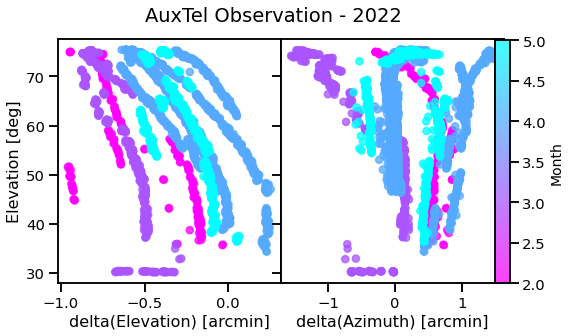

In [24]:
# fig = plt.figure(figsize=(10,4))
# plt.subplot(1, 2, 1)

fig, axs = plt.subplots(1,2, figsize=(8, 4.5), sharey='all')
plt.subplots_adjust(wspace=0.)
im =axs[0].scatter(df.dEL, df.EL, alpha=0.75, s=50, c=df.month, cmap='cool_r')
# plt.scatter(df1.dEL[outliers2], df1.EL[outliers2], s=50, alpha=0.6)
axs[0].set_ylabel('Elevation [deg]',fontsize=16)
axs[0].set_xlabel('delta(Elevation) [arcmin]',fontsize=16)
axs[1].scatter(df.dAZ, df.EL, alpha=0.75, s=50,label=f'{len(df3)} Fields', c=df.month, cmap='cool_r')
axs[1].set_xlabel('delta(Azimuth) [arcmin]',fontsize=16)

plt.draw()
p0 = axs[0].get_position().get_points().flatten()
p1 = axs[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p1[2]-0.015, 0.125, 0.025, p1[2]-p0[0]-0.025])
fig.colorbar(im, cax=ax_cbar).set_label('Month',fontsize=14)
fig.subplots_adjust(wspace=0.)
fig.suptitle(f'AuxTel Observation - 2022')
fig.savefig(f'figures/elevation_offsets_{month}.png',facecolor='w',transparent=False,dpi=100)

(array([  6.,  40., 100.,   0.,  11.,   6.,  17.,  12.,  26.,  18., 129.,
         42., 104.,  27.]),
 array([-37.11527851, -31.06861492, -25.02195133, -18.97528773,
        -12.92862414,  -6.88196055,  -0.83529696,   5.21136663,
         11.25803023,  17.30469382,  23.35135741,  29.398021  ,
         35.44468459,  41.49134819,  47.53801178]),
 <BarContainer object of 14 artists>)

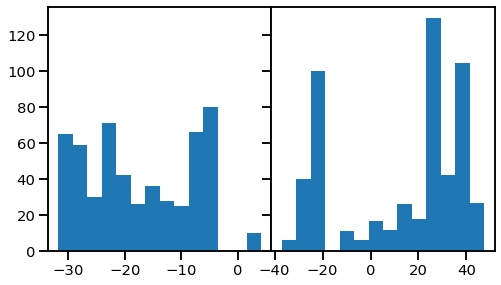

In [25]:
fig, axs = plt.subplots(1,2, figsize=(8, 4.5), sharey='all')
plt.subplots_adjust(wspace=0.)

axs[0].hist(df4.dEL*60,bins=14)
axs[1].hist(df4.dAZ*60,bins=14)

In [26]:
sns.set_context('talk', font_scale=0.7)
sns.set_style('whitegrid')

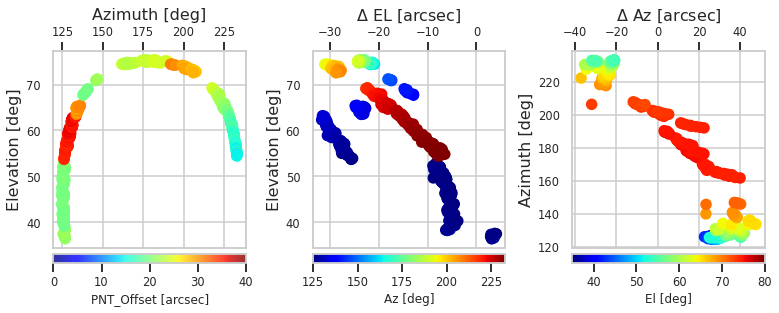

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(16*0.5+3, 9*0.5))
plt.subplots_adjust(wspace=0.4)

im0 = axs[0].scatter(df4.AZ, df4.EL, s=100, alpha=0.8, c=df4.PNT_OFFSET*60, vmin=0, vmax=40, label=f'{len(df1)} Fields', cmap='jet')
axs[0].set_ylabel('Elevation [deg]',fontsize=16)
axs[0].set_title(r'Azimuth [deg]',fontsize=16)
axs[0].xaxis.set_ticks_position('top')

im1 = axs[1].scatter(df4.dEL*60,df4.EL,s=100, c=df4.AZ, cmap='jet')#, vmin=-40, vmax=40)
axs[1].set_ylabel('Elevation [deg]',fontsize=16)
axs[1].set_title(r'$\Delta$ EL [arcsec]',fontsize=16)
axs[1].xaxis.set_ticks_position('top')

im2 = axs[2].scatter(df4.dAZ*60,df4.AZ,s=100, c=df4.EL, cmap='jet',vmin=35, vmax=80)#, vmin=-30., vmax=0.)
axs[2].set_ylabel('Azimuth [deg]',fontsize=16)
axs[2].set_title(r'$\Delta$ Az [arcsec]',fontsize=16)
axs[2].xaxis.set_ticks_position('top')

plt.colorbar(im0, ax=axs[0], pad=0.025, orientation='horizontal').set_label(r'PNT_Offset [arcsec]',fontsize=12)
plt.colorbar(im1, ax=axs[1], pad=0.025, orientation='horizontal').set_label(r'Az [deg]',fontsize=12)
plt.colorbar(im2, ax=axs[2], pad=0.025, orientation='horizontal').set_label(r'El [deg]',fontsize=12)
plt.tight_layout()
fig.savefig(f'figures/AzEl_pannel_{month}.png',facecolor='w',transparent=False,dpi=100)

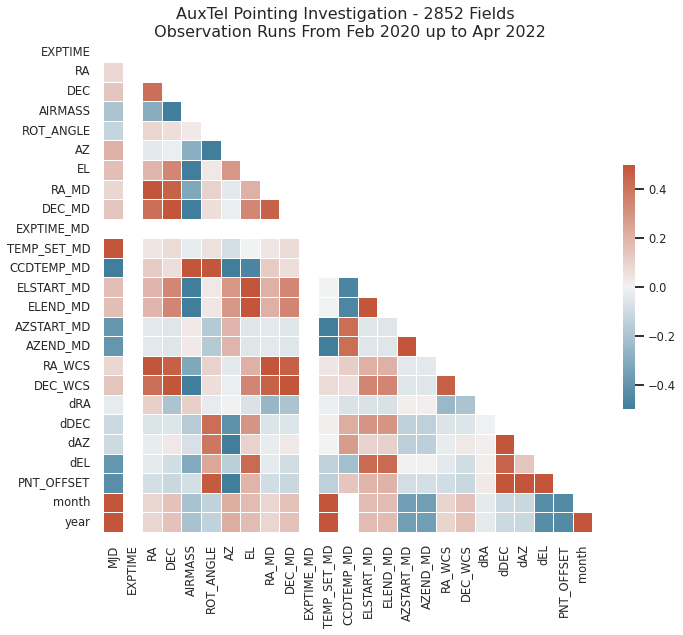

In [28]:
# Compute the correlation matrix
df1b = df.copy()
df1b.dEL = np.abs(df1b.dEL)
df1b.dDEC = np.abs(df1b.dDEC)

df1b.dAZ = np.abs(df1b.dAZ)
df1b.dRA = np.abs(df1b.dRA)

df_corr = df1b.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(f'AuxTel Pointing Investigation - {len(df)} Fields \n Observation Runs From Feb 2020 up to Apr 2022',fontsize=16)
plt.savefig(f'figures/rev_correlation_matrix_{month}.png',facecolor='w',transparent=False,dpi=100)

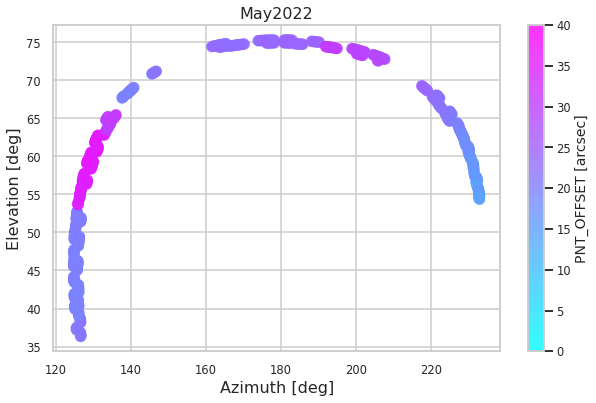

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df4.AZ, df4.EL, s=100, alpha=0.8, c=df4.PNT_OFFSET*60, vmin=0, vmax=40, label=f'{len(df1)} Fields', cmap='cool')
plt.colorbar().set_label('PNT_OFFSET [arcsec]',fontsize=14)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)
plt.title(f'{month}',fontsize=16)
plt.savefig(f'figures/azel_plane_{month}.png',facecolor='w',transparent=False,dpi=100)

Text(0.5, 1.0, 'Sep 2021 - March 2022')

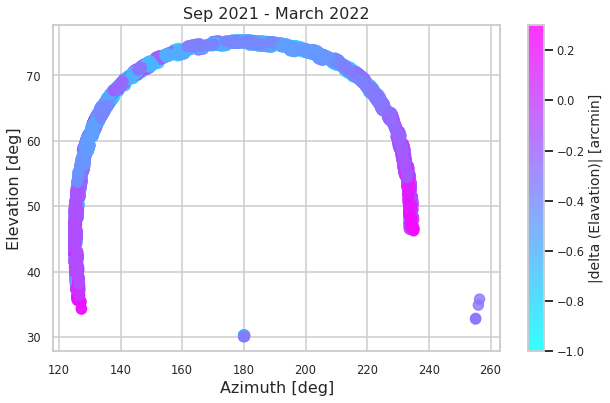

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df1.AZ[sep_up], df1.EL[sep_up], s=100, alpha=0.8, vmin=-1., vmax=0.3, c=df1.dEL[sep_up], label=f'{len(df1)} Fields', cmap='cool')
plt.colorbar().set_label('|delta (Elavation)| [arcmin]',fontsize=14)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)
plt.title('Sep 2021 - March 2022',fontsize=16)